Neste notebook faremos a redução de dimensionalidade de uma imagem colorida para escalas de cinza, e a partir daí binarizada. O desafio propõe a limitação de não utilizar bibliotecas para este processamento de imagem.

#Importação inicial de bibliotecas necessárias

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#Carregamento da imagem

In [2]:
def load_image(image_path):
    img = Image.open(image_path)
    return np.array(img)

#Função para escala de cinza

In [3]:
def rgb_to_grayscale(img_array):
    # Coeficientes de luminância (padrão REC 601)
    r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray.astype(np.uint8)

#Função de binarização

In [4]:
def grayscale_to_binary(gray_array, threshold=128):
    binary = np.where(gray_array > threshold, 255, 0)
    return binary.astype(np.uint8)

#Criação de função para o processamento das imagens

In [5]:
def process_image(image_path, threshold=128):
    # Carrega a imagem original
    original_img = load_image(image_path)

    # Converte para grayscale
    gray_img = rgb_to_grayscale(original_img)

    # Binariza
    binary_img = grayscale_to_binary(gray_img, threshold)

    # Exibe os resultados
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Escala de Cinza')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(binary_img, cmap='gray')
    plt.title('Binarizada')
    plt.axis('off')

    plt.show()

    return gray_img, binary_img

#Execução da função

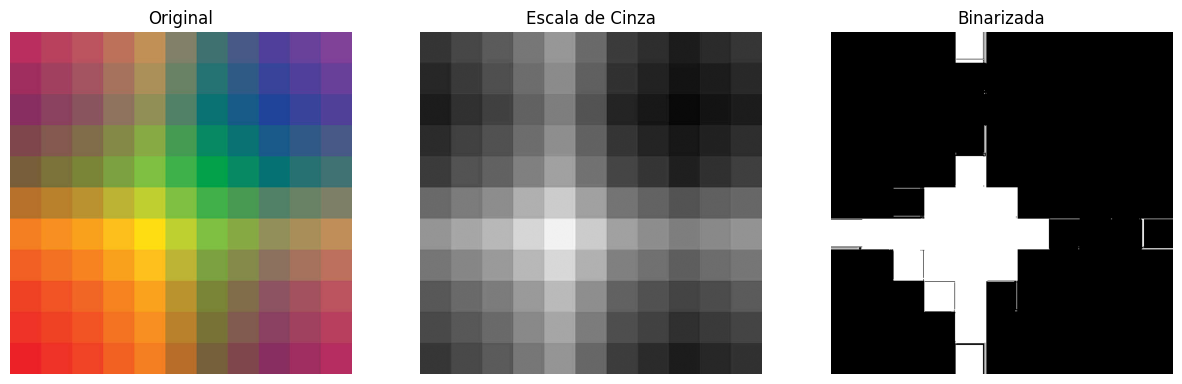

In [6]:
gray, binary = process_image("/content/quadrados coloridos.jpg", threshold=150)